Name: Safwan Fathi bin Muhammad FahmiRauf Mat Number:1810009

Question: C) Calculating the number of coins in an image using contours. (5 Marks)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [51]:
path = '/content/drive/MyDrive/KPTPACE-DLCV-Workshop.gitfront/Assignment 1/'

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import glob
from PIL import Image 
from IPython.display import Image
%matplotlib inline

Total available circle is 11


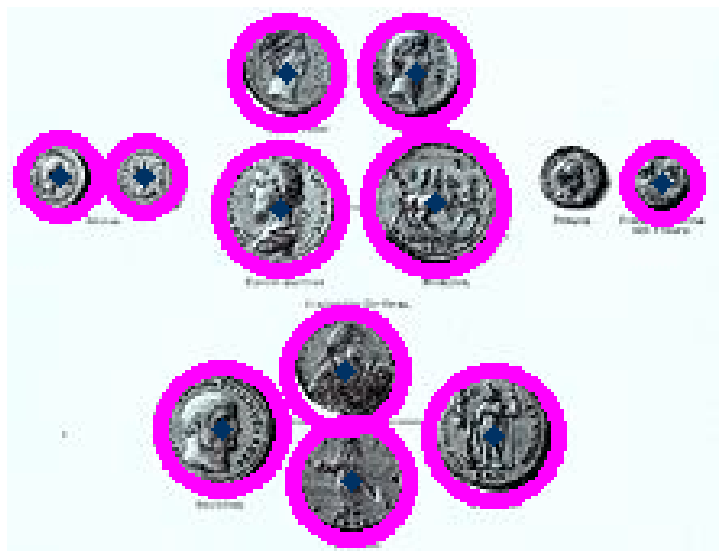

In [53]:
img = cv2.imread(path+"coin.jpg")
images = []
circle = []

#grayscale
gryimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
color_covert = cv2.cvtColor(gryimg, cv2.COLOR_BGR2RGB)

#blur
blurimg = cv2.medianBlur(gryimg, 9)

#edge detection
canny = cv2.Canny(blurimg,100,250)
#dilation
kernel = np.ones((1,1),np.uint8)
dilation = cv2.dilate(canny, kernel, iterations=1)

#hough transform
rows = dilation.shape[0]
circles = cv2.HoughCircles(dilation, cv2.HOUGH_GRADIENT, 1, rows / 8,
                               param1=100, param2=30,
                               minRadius=0, maxRadius=0)
circles = np.uint16(np.around(circles))
  #print(type(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(img, (i[0],i[1]), 1, (0, 50, 100), 3)
    cv2.circle(img, (i[0],i[1]), i[2], (255, 0, 255), 3)
    circle.append(i)

print('Total available circle is', len(circle)) 
plt.figure(figsize=[30,10])

plt.axis('off')
plt.imshow(img)